<a href="https://colab.research.google.com/github/soumyasahaiitb/wids_project-repo/blob/master/SoumyaSaha_WiDS_Project_UID_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Random Forest Regressor model


Mean Absolute Error: 0.0900918181644379
Mean squared error: 0.016342330337644494
R2 Score: 0.3347951735370507
Root Mean Squared Error : 0.1278371242544375
Accuracy Percentage of Random Forest Regression model : 93.28993490235354


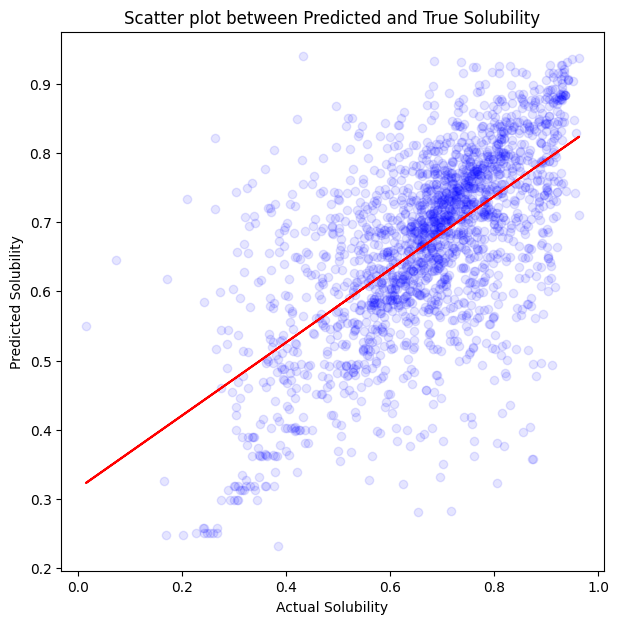

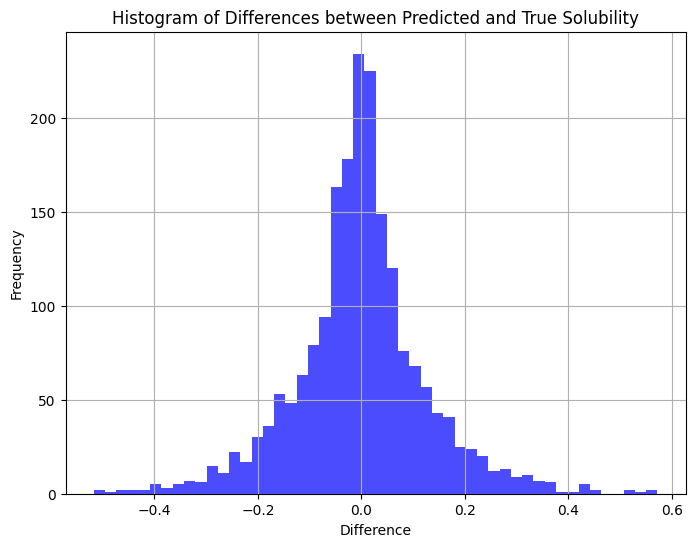

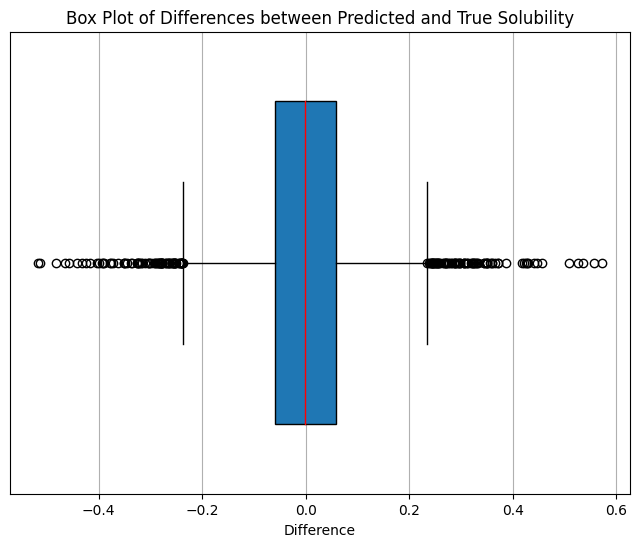

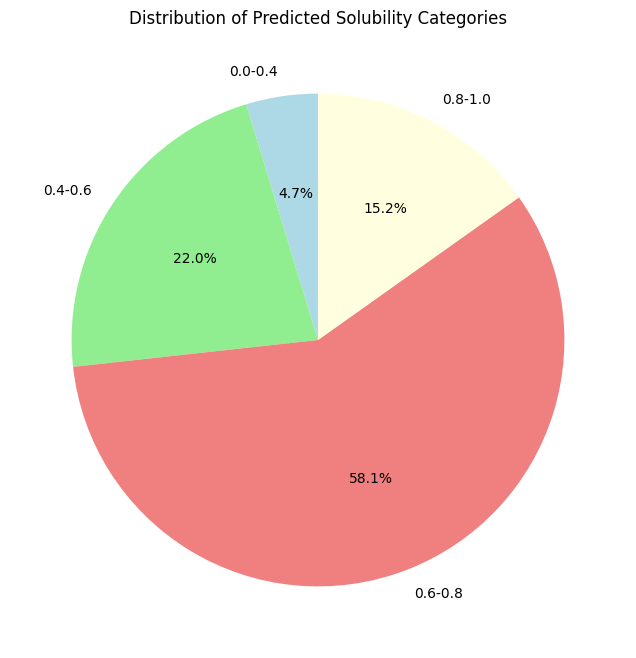

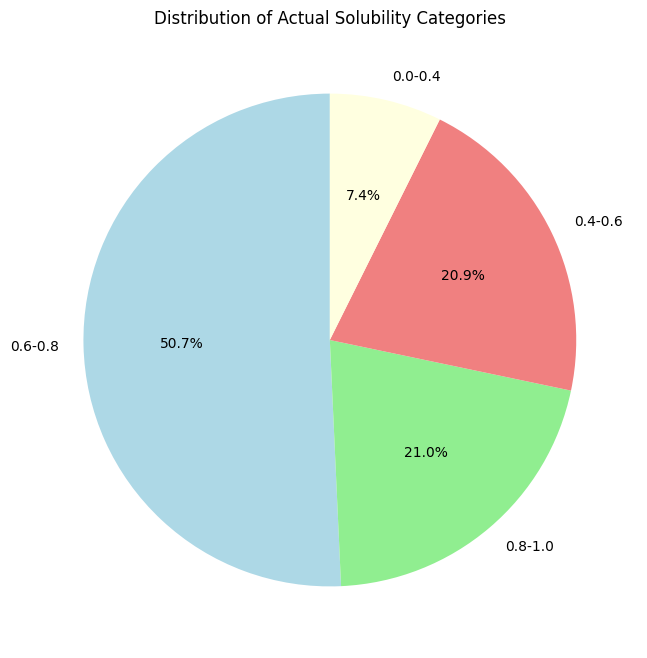

In [14]:
# Using Random Forest Regressor Model

# Importing of libraries and modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from rdkit import Chem
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# Ignoring all the warnings so that no warning is shown in the output
import os
import sys
sys.stderr = open(os.devnull, 'w')
sys.stderr = sys.__stderr__

# Reading and displaying the csv file of solubility
df = pd.read_csv("https://raw.githubusercontent.com/soumyasahaiitb/wids_project-repo/master/WiDS%20project%20solubility%20.csv")
df.drop("Unnamed: 11", axis =1)

# Preprocessing and normalization
def df_normalize(df, i = 3):
  min_max_scaler = preprocessing.MinMaxScaler()
  df.iloc[:,i:] = min_max_scaler.fit_transform(df.iloc[:,i:].T).T
df_normalize(df)
scaler = MinMaxScaler()
df['log S'] = scaler.fit_transform(df[['log S']])

# Adding molecular descriptors
smiles_col = 'SMILES'
target_col = 'log S'
df[smiles_col] = df[smiles_col].astype(str)
df['MOLECULAR WEIGHT'] = df[smiles_col].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)) if x is not None else None)
df['logP'] = df[smiles_col].apply(lambda x: Descriptors.MolLogP(Chem.MolFromSmiles(x)) if x is not None else None)
df['TPSA'] = df[smiles_col].apply(lambda x: Descriptors.TPSA(Chem.MolFromSmiles(x)) if x is not None else None)
df['NUMBER OF H ACCEPTORS'] = df[smiles_col].apply(lambda x: Descriptors.NumHAcceptors(Chem.MolFromSmiles(x)) if x is not None else None)
df['NUMBER OF H DONORS'] = df[smiles_col].apply(lambda x: Descriptors.NumHDonors(Chem.MolFromSmiles(x)) if x is not None else None)
df['NUMBER OF ROTATABLE BONDS'] = df[smiles_col].apply(lambda x: Descriptors.NumRotatableBonds(Chem.MolFromSmiles(x)) if x is not None else None)
df['NUMBER OF VALENCE ELECTRONS'] = df[smiles_col].apply(lambda x: Descriptors.NumValenceElectrons(Chem.MolFromSmiles(x)) if x is not None else None)
df['NUMBER OF AROMATIC RINGS'] = df[smiles_col].apply(lambda x: Descriptors.NumAromaticRings(Chem.MolFromSmiles(x)) if x is not None else None)
df.dropna(subset=[target_col], inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[["MOLECULAR WEIGHT"]], df[target_col], test_size=0.2, random_state=100)

# Initialize the model
model = RandomForestRegressor(n_estimators=200, random_state=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae_1 = mean_absolute_error(y_test, y_pred)
mse_1 = mean_squared_error(y_test, y_pred)
r2_1 = r2_score(y_test, y_pred)
rmse_1 = np.sqrt(mse_1)
print(f'Mean Absolute Error: {mae_1}')
print(f"Mean squared error: {mse_1}")
print(f"R2 Score: {r2_1}")
print(f"Root Mean Squared Error : {rmse_1}")
tolerance = 0.25  # Define your tolerance threshold
accuracy_percentage_1 = np.mean(np.abs(y_pred - y_test) < tolerance) * 100
print(f"Accuracy Percentage of Random Forest Regression model : {accuracy_percentage_1}")

# Plotting the scatter plot between predicted solubility and actual solubility
plt.figure(figsize=(7,7))
plt.scatter(x=y_test,y=y_pred,c="blue", alpha =0.1 )
z = np.polyfit(y_test,y_pred,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),c="Red")
plt.title('Scatter plot between Predicted and True Solubility')
plt.ylabel("Predicted Solubility")
plt.xlabel("Actual Solubility")

# Plot a histogram
differences = y_pred - y_test # Calculate the differences between predicted and true solubility values
plt.figure(figsize=(8, 6))
plt.hist(differences, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Differences between Predicted and True Solubility')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Creating box plot
differences = y_pred - y_test # Calculate the differences between predicted and true solubility values
plt.figure(figsize=(8, 6))
plt.boxplot(differences, vert=False, widths=0.7, patch_artist=True, medianprops={'color': 'red'})
plt.title('Box Plot of Differences between Predicted and True Solubility')
plt.xlabel('Difference')
plt.yticks([])  # Remove y-axis ticks for horizontal box plot
plt.grid(True)
plt.show()

# Making two Pie charts showing the Actual and Predicted solubility values
solubility_ranges = [0, 0.4, 0.6, 0.8, 1.0]  # Categorize predictions into solubility ranges
categories = [ '0.0-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
predicted_categories = pd.cut(y_pred, bins=solubility_ranges, labels=categories)
actual_categories = pd.cut(y_test, bins=solubility_ranges, labels=categories)
category_counts_pred = predicted_categories.value_counts() # Count the occurrences of each category
category_counts_test = actual_categories.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts_pred, labels=category_counts_pred.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink'])
plt.title('Distribution of Predicted Solubility Categories')
plt.show()
plt.figure(figsize=(8, 8))
plt.pie(category_counts_test, labels=category_counts_test.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink'])
plt.title('Distribution of Actual Solubility Categories')
plt.show()

















# Using Linear Regression Model

Mean Absolute Error: 0.11150557417483223
Mean squared error: 0.022007367663621512
R2 Score: 0.10420320204494637
Root Mean Squared Error : 0.1483488040518747
Accuracy Percentage of Linear Regression model : 91.93790686029043


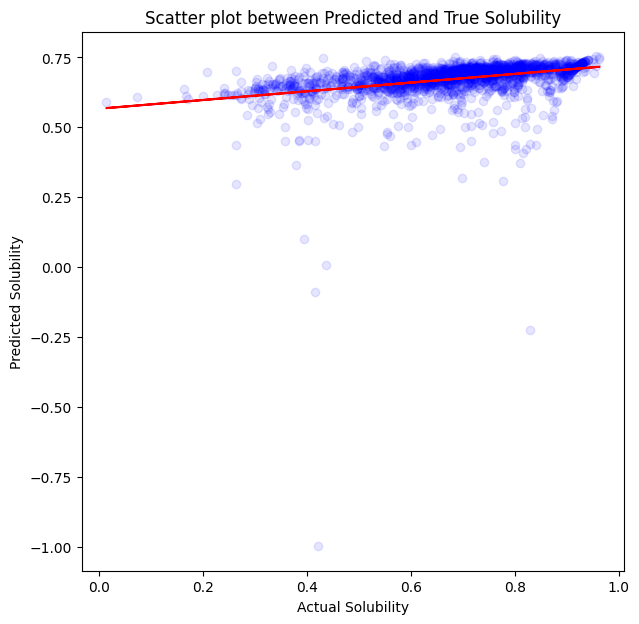

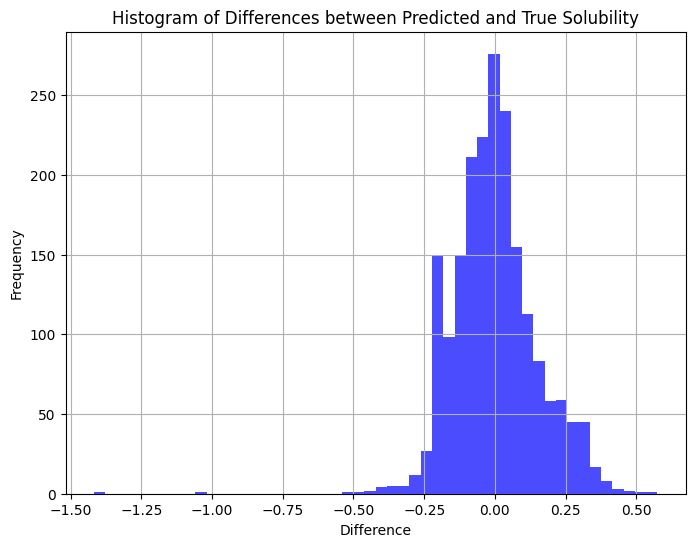

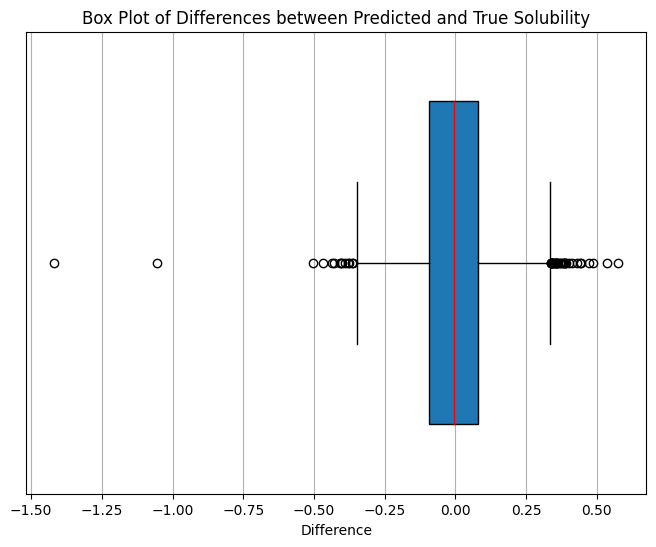

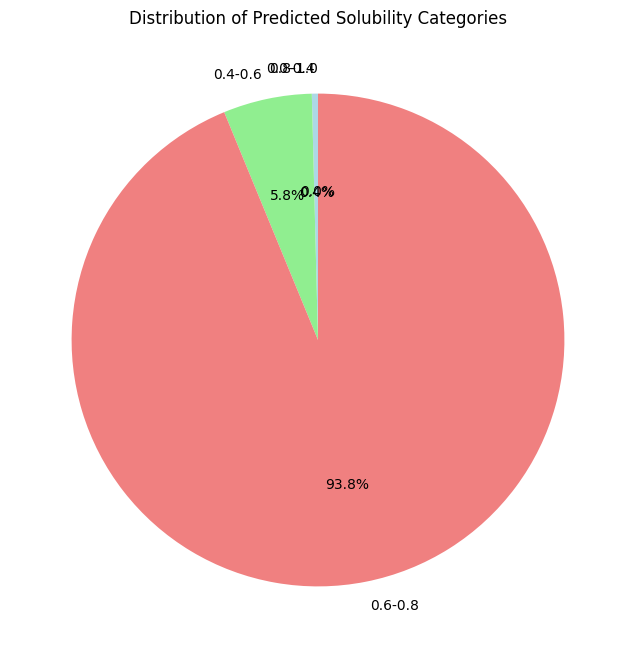

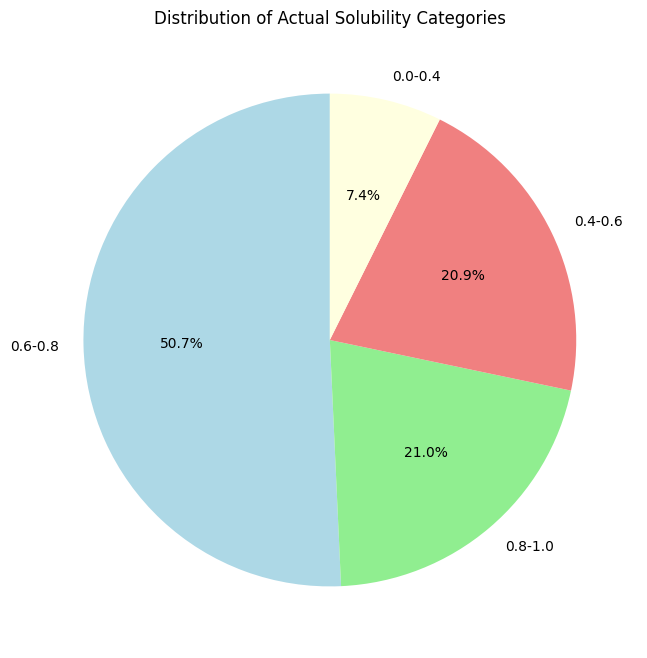

In [15]:
# Using Linear Regression Model

# Importing of libraries and modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from rdkit import Chem
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# Ignoring all the warnings so that no warning is shown in the output
import os
import sys
sys.stderr = open(os.devnull, 'w')
sys.stderr = sys.__stderr__

# Reading and displaying the csv file of solubility
df = pd.read_csv("https://raw.githubusercontent.com/soumyasahaiitb/wids_project-repo/master/WiDS%20project%20solubility%20.csv")
df.drop("Unnamed: 11", axis =1)

# Preprocessing and normalization
def df_normalize(df, i = 3):
  min_max_scaler = preprocessing.MinMaxScaler()
  df.iloc[:,i:] = min_max_scaler.fit_transform(df.iloc[:,i:].T).T
df_normalize(df)
scaler = MinMaxScaler()
df['log S'] = scaler.fit_transform(df[['log S']])

# Adding molecular descriptors
smiles_col = 'SMILES'
target_col = 'log S'
df[smiles_col] = df[smiles_col].astype(str)
df['MOLECULAR WEIGHT'] = df[smiles_col].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)) if x is not None else None)
df['logP'] = df[smiles_col].apply(lambda x: Descriptors.MolLogP(Chem.MolFromSmiles(x)) if x is not None else None)
df['TPSA'] = df[smiles_col].apply(lambda x: Descriptors.TPSA(Chem.MolFromSmiles(x)) if x is not None else None)
df['NUMBER OF H ACCEPTORS'] = df[smiles_col].apply(lambda x: Descriptors.NumHAcceptors(Chem.MolFromSmiles(x)) if x is not None else None)
df['NUMBER OF H DONORS'] = df[smiles_col].apply(lambda x: Descriptors.NumHDonors(Chem.MolFromSmiles(x)) if x is not None else None)
df['NUMBER OF ROTATABLE BONDS'] = df[smiles_col].apply(lambda x: Descriptors.NumRotatableBonds(Chem.MolFromSmiles(x)) if x is not None else None)
df['NUMBER OF VALENCE ELECTRONS'] = df[smiles_col].apply(lambda x: Descriptors.NumValenceElectrons(Chem.MolFromSmiles(x)) if x is not None else None)
df['NUMBER OF AROMATIC RINGS'] = df[smiles_col].apply(lambda x: Descriptors.NumAromaticRings(Chem.MolFromSmiles(x)) if x is not None else None)
df.dropna(subset=[target_col], inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[["MOLECULAR WEIGHT"]], df[target_col], test_size=0.2, random_state=100)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae_2 = mean_absolute_error(y_test, y_pred)
mse_2 = mean_squared_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)
rmse_2 = np.sqrt(mse_2)
print(f'Mean Absolute Error: {mae_2}')
print(f"Mean squared error: {mse_2}")
print(f"R2 Score: {r2_2}")
print(f"Root Mean Squared Error : {rmse_2}")
tolerance = 0.25  # Define your tolerance threshold
accuracy_percentage_2 = np.mean(np.abs(y_pred - y_test) < tolerance) * 100
print(f"Accuracy Percentage of Linear Regression model : {accuracy_percentage_2}")

# Plotting the scatter plot between predicted solubility and actual solubility
plt.figure(figsize=(7,7))
plt.scatter(x=y_test,y=y_pred,c="blue", alpha =0.1 )
z = np.polyfit(y_test,y_pred,1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),c="Red")
plt.title('Scatter plot between Predicted and True Solubility')
plt.ylabel("Predicted Solubility")
plt.xlabel("Actual Solubility")

# Plot a histogram
differences = y_pred - y_test # Calculate the differences between predicted and true solubility values
plt.figure(figsize=(8, 6))
plt.hist(differences, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Differences between Predicted and True Solubility')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Creating box plot
differences = y_pred - y_test # Calculate the differences between predicted and true solubility values
plt.figure(figsize=(8, 6))
plt.boxplot(differences, vert=False, widths=0.7, patch_artist=True, medianprops={'color': 'red'})
plt.title('Box Plot of Differences between Predicted and True Solubility')
plt.xlabel('Difference')
plt.yticks([])  # Remove y-axis ticks for horizontal box plot
plt.grid(True)
plt.show()

# Making two Pie charts showing the Actual and Predicted solubility values
solubility_ranges = [0, 0.4, 0.6, 0.8, 1.0]  # Categorize predictions into solubility ranges
categories = [ '0.0-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
predicted_categories = pd.cut(y_pred, bins=solubility_ranges, labels=categories)
actual_categories = pd.cut(y_test, bins=solubility_ranges, labels=categories)
category_counts_pred = predicted_categories.value_counts() # Count the occurrences of each category
category_counts_test = actual_categories.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts_pred, labels=category_counts_pred.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink'],labeldistance=1.1)
plt.title('Distribution of Predicted Solubility Categories')
plt.show()
plt.figure(figsize=(8, 8))
plt.pie(category_counts_test, labels=category_counts_test.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink'])
plt.title('Distribution of Actual Solubility Categories')
plt.show()


# Comparison between two models


In [16]:
# Here , I will compare between the two models Random Forest Regressor and Linear Regression model

import pandas as pd
compare = {"Name of the model" : pd.Series(["Random Forest Regression","Linear Regression"], index =['1','2']),
           "Mean Absolute Error" : pd.Series([mae_1,mae_2],index=['1','2']),
           "Mean Squared Error" : pd.Series([mse_1,mse_2],index = ['1','2']),
           "R Squared Score" : pd.Series([r2_1,r2_2],index = ['1','2']),
           "Root Mean Squared Error" : pd.Series([rmse_1,rmse_2],index = ['1','2']),
           "Accuracy Percentage" : pd.Series([accuracy_percentage_1,accuracy_percentage_2],index = ['1','2'])}
df_2 = pd.DataFrame(compare)
df_2

,Name of the model,Mean Absolute Error,Mean Squared Error,R Squared Score,Root Mean Squared Error,Accuracy Percentage
1,Random Forest Regression,0.090092,0.016342,0.334795,0.127837,93.289935
2,Linear Regression,0.111506,0.022007,0.104203,0.148349,91.937907
